# 八.图像腐蚀与图像膨胀



讲解Python调用OpenCV实现图像腐蚀和图像膨胀的算法

1.基础理论

2.图像腐蚀代码实现

3.图像膨胀代码实现


## 8.1基础知识

图像的膨胀（Dilation）和腐蚀（Erosion）是两种基本的形态学运算，主要用来寻找图像中的极大区域和极小区域。其中膨胀类似于“领域扩张”，将图像中的高亮区域或白色部分进行扩张，其运行结果图比原图的高亮区域更大；腐蚀类似于“领域被蚕食”，将图像中的高亮区域或白色部分进行缩减细化，其运行结果图比原图的高亮区域更小。


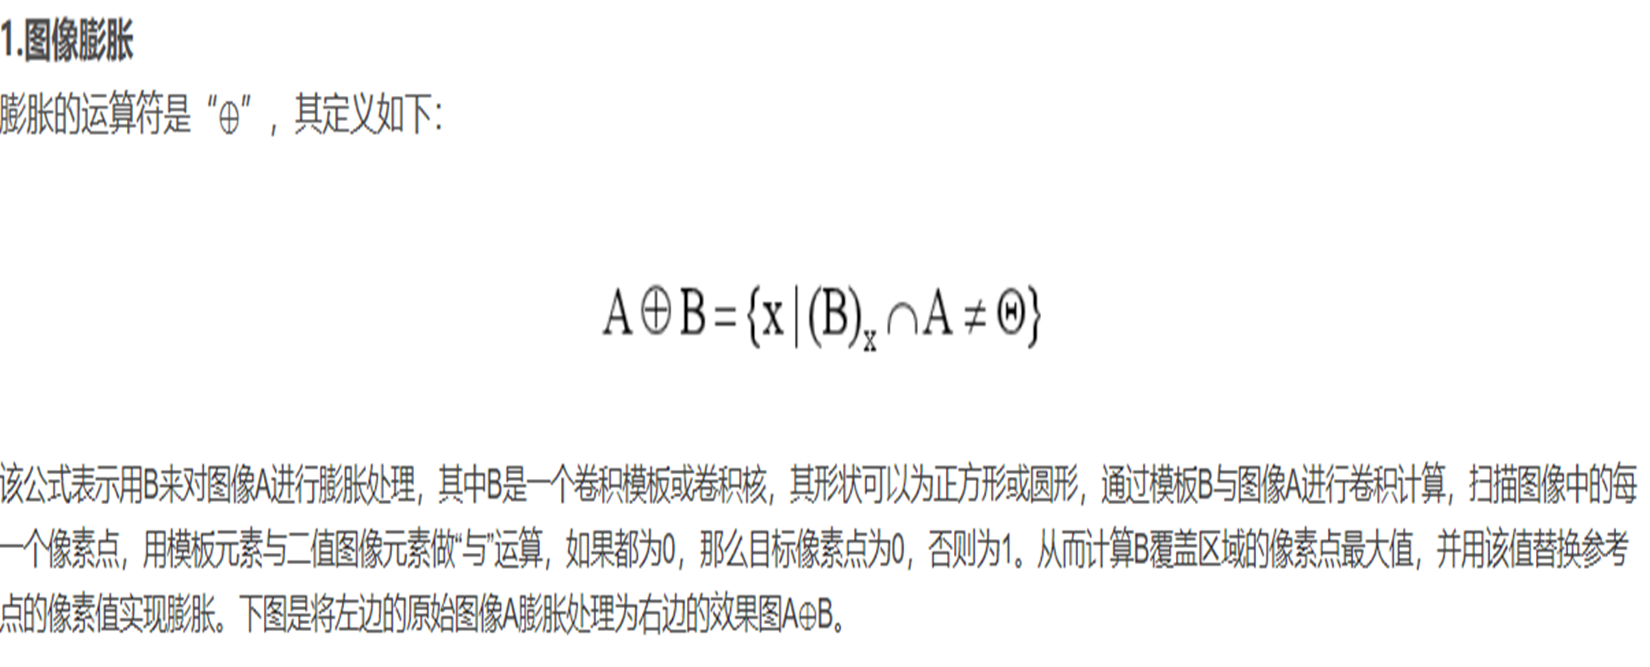

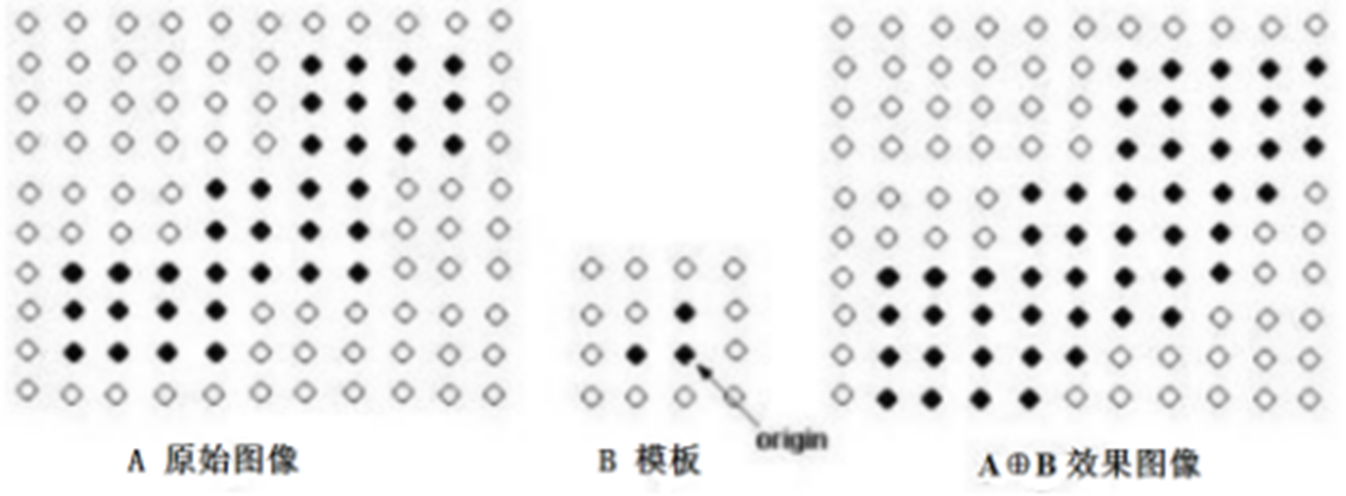

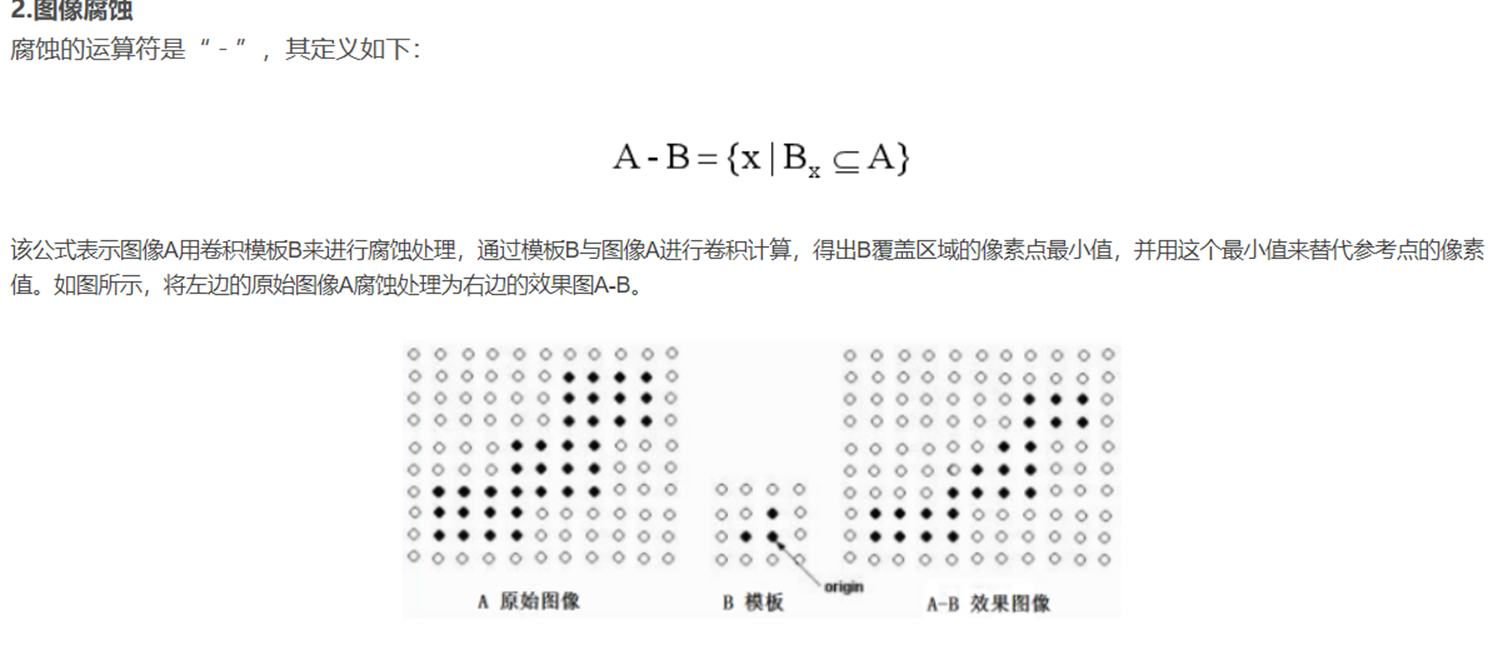

## 8.2图像腐蚀

1.基础理论

形态学转换主要针对的是二值图像（0或1）。图像腐蚀类似于“领域被蚕食”，将图像中的高亮区域或白色部分进行缩减细化，其运行结果图比原图的高亮区域更小。其主要包括两个输入对象：

(1)二值图像

(2)卷积核

卷积核是腐蚀中的关键数组，采用numpy库可以生成。卷积核的中心点逐个像素扫描原始图像，如下图所示：


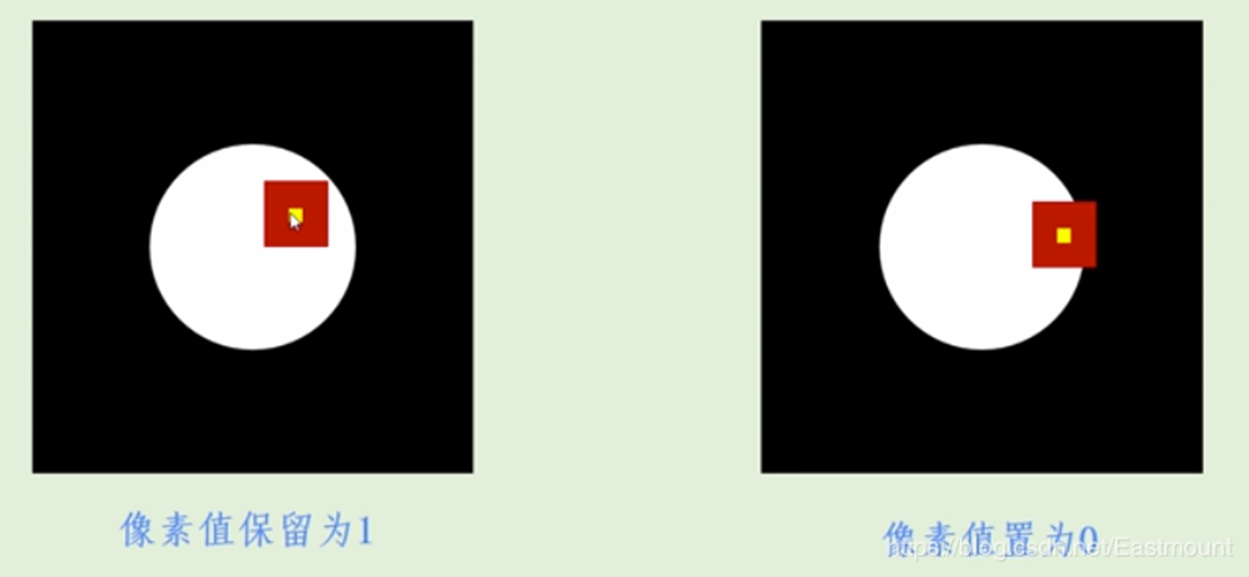

被扫描到的原始图像中的像素点，只有当卷积核对应的元素值均为1时，其值才为1，否则其值修改为0。换句话说，遍历到的黄色点位置，
其周围全部是白色，
保留白色，
否则变为黑色，
图像腐蚀变小。 


2.函数原型

图像腐蚀主要使用的函数为erode，其原型如下：

dst = cv2.erode(src, kernel, iterations)

参数dst表示处理的结果，src表示原图像，kernel表示卷积核，iterations表示迭代次数。下图表示5*5的卷积核，可以采用函数 np.ones((5,5), np.uint8) 构建。


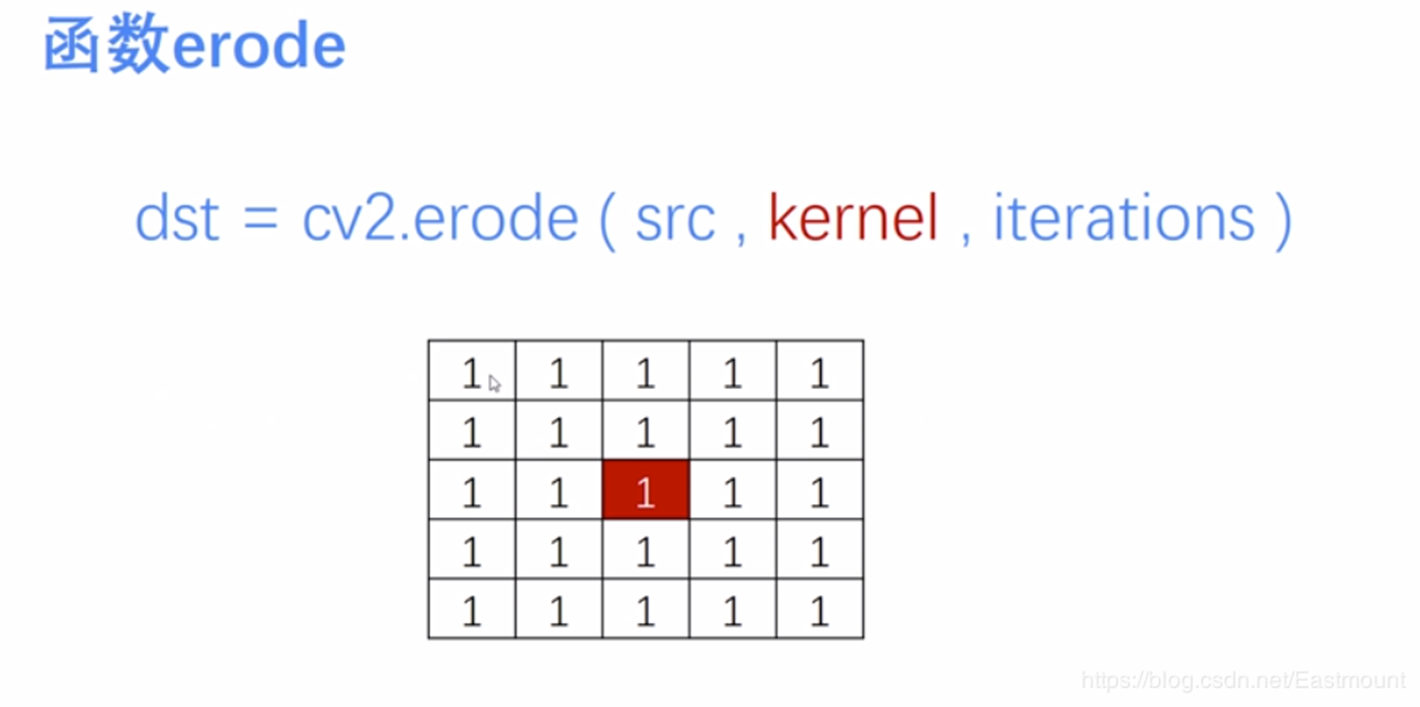

In [ ]:
import cv2  
import numpy as np  

#读取图片
src = cv2.imread('test.jpg', cv2.IMREAD_UNCHANGED)

#设置卷积核
kernel = np.ones((5,5), np.uint8)

#图像腐蚀处理
erosion = cv2.erode(src, kernel)

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", erosion)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


由图可见，干扰的细线被进行了清洗，但仍然有些轮廓，此时可设置迭代次数进行腐蚀。 

erosion = cv2.erode(src, kernel,iterations=9)

输出结果如下图所示：


In [ ]:
import cv2  
import numpy as np  

#读取图片
src = cv2.imread('test.jpg', cv2.IMREAD_UNCHANGED)

#设置卷积核
kernel = np.ones((5,5), np.uint8)

#图像腐蚀处理
erosion = cv2.erode(src, kernel,iterations=9)

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", erosion)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

## 8.3图像膨胀

1.基础理论图像膨胀是腐蚀操作的逆操作，类似于“领域扩张”，将图像中的高亮区域或白色部分进行扩张，其运行结果图比原图的高亮区域更大，线条变粗了，主要用于去噪。

(1) 图像被腐蚀后，去除了噪声，但是会压缩图像。

(2) 对腐蚀过的图像，进行膨胀处理，可以去除噪声，并且保持原有形状。


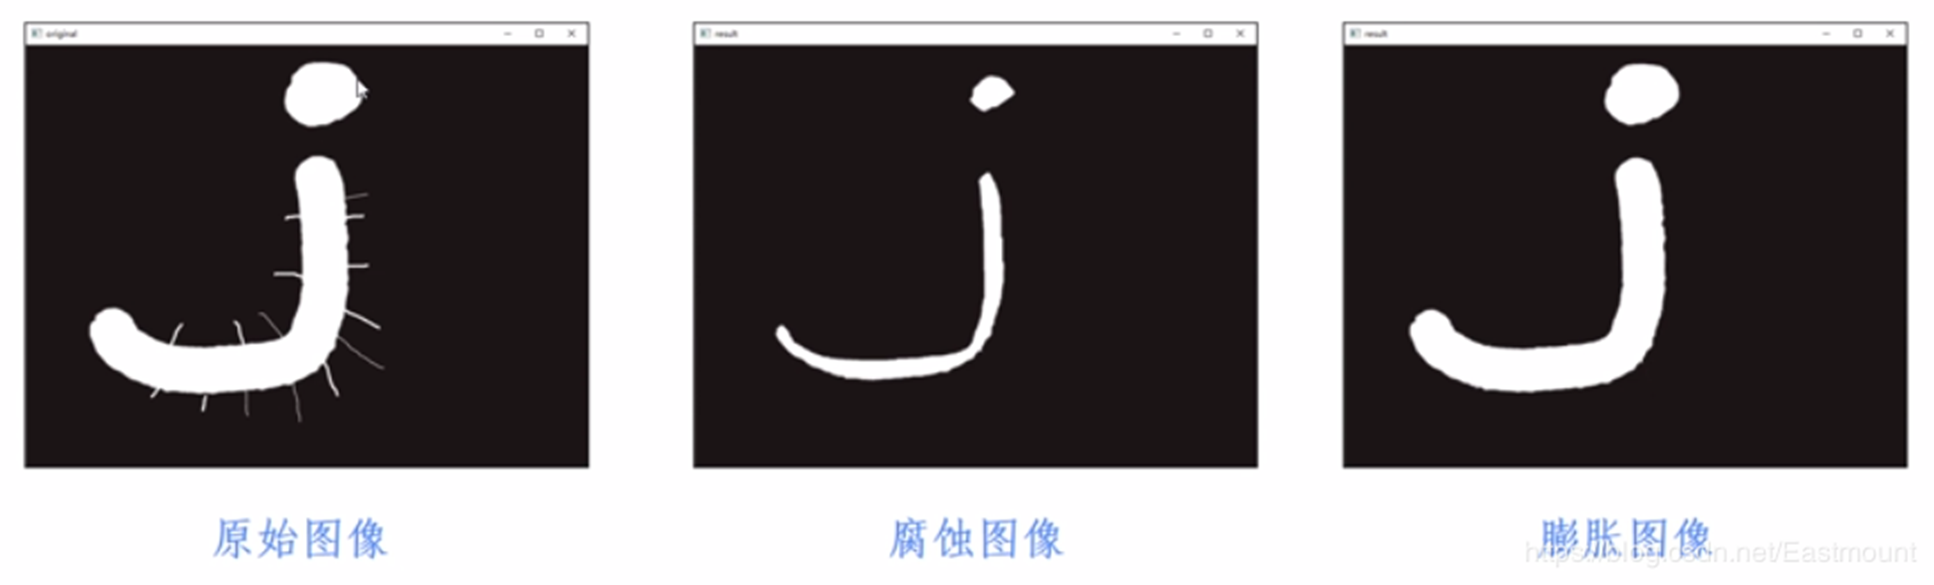

它也包括两个输入对象：

(1)二值图像或原始图像

(2)卷积核

卷积核是腐蚀中的关键数组，采用numpy库可以生成。卷积核的中心点逐个像素扫描原始图像，如下图所示：


被扫描到的原始图像中的像素点，当卷积核对应的元素值只要有一个为1时，其值就为1，否则为0。


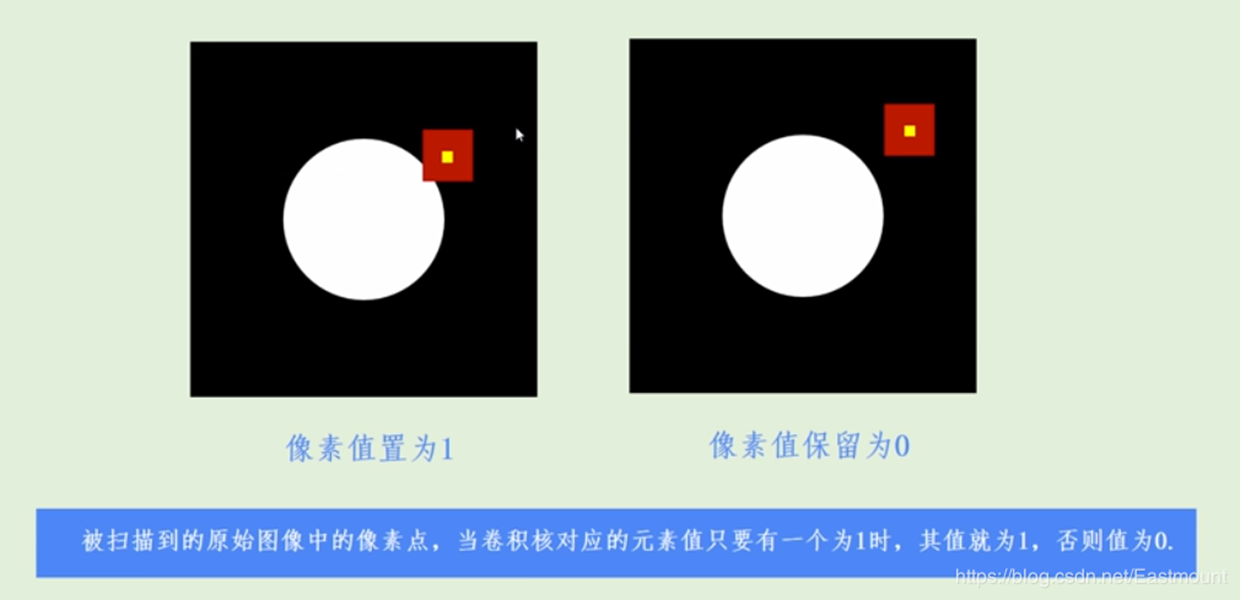

2.函数原型

图像膨胀主要使用的函数为dilate，其原型如下：

dst = cv2.dilate(src, kernel, iterations)

参数dst表示处理的结果，src表示原图像，kernel表示卷积核，iterations表示迭代次数。下图表示5*5的卷积核，可以采用函数 np.ones((5,5), np.uint8) 构建。


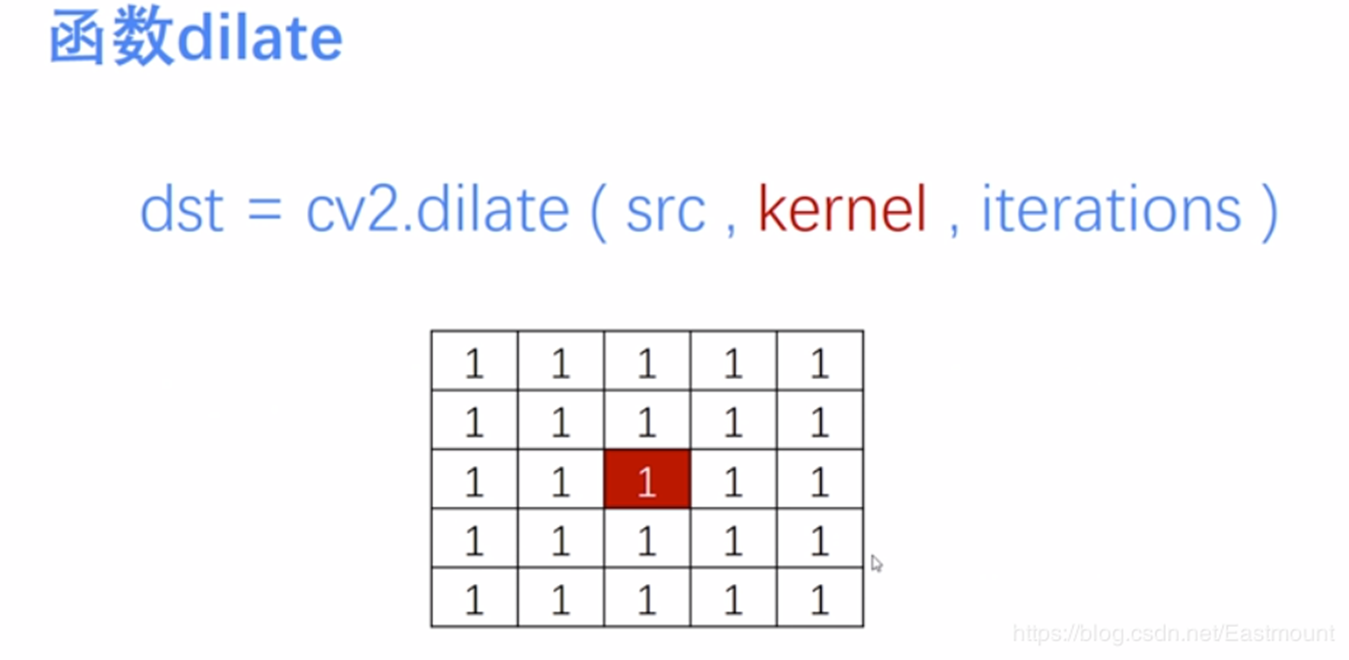

注意：迭代次数默认是1，表示进行一次膨胀，也可以根据需要进行多次迭代，进行多次膨胀。通常进行1次膨胀即可。

代码实现


In [ ]:
import cv2  
import numpy as np  

#读取图片
src = cv2.imread('test.jpg', cv2.IMREAD_UNCHANGED)

#设置卷积核
kernel = np.ones((5,5), np.uint8)

#图像膨胀处理
erosion = cv2.dilate(src, kernel)

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", erosion)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


图像去噪通常需要先腐蚀后膨胀，这又称为开运算，下篇文章将详细介绍。如下图所示：

erosion = cv2.erode(src, kernel)

result = cv2.dilate(erosion, kernel)

